### Experiment 1A

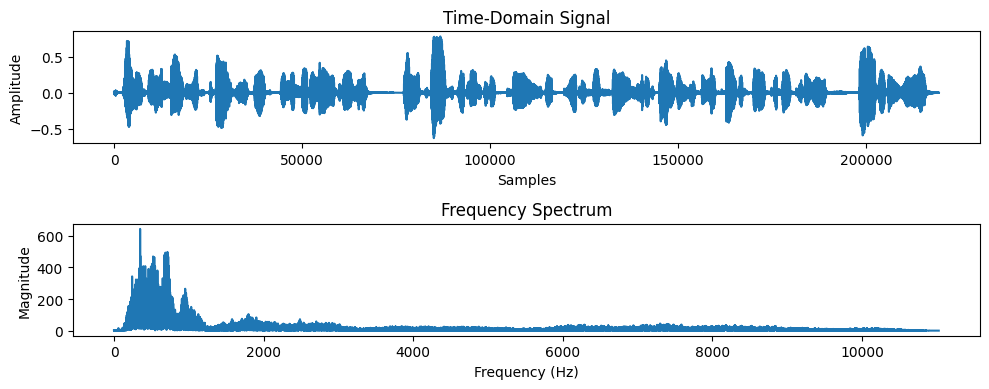

In [7]:
import torchaudio
import numpy as np
import matplotlib.pyplot as plt
import librosa

#Loading a speech waveform from the LJ Speech dataset.
file_path = "/content/LJ001-0014.wav"
waveform, sample_rate = torchaudio.load(file_path)
waveform = waveform.mean(dim=0).numpy()

#Applying the Fast Fourier Transform (FFT) to obtain the frequency spectrum.
fft_result = np.fft.fft(waveform)
frequencies = np.fft.fftfreq(len(fft_result), d=1/sample_rate)
magnitude = np.abs(fft_result)

#Plotting the time-domain and frequency-domain representations.
plt.figure(figsize=(10, 4))

plt.subplot(2, 1, 1)
plt.plot(waveform)
plt.title("Time-Domain Signal")
plt.xlabel("Samples")
plt.ylabel("Amplitude")

plt.subplot(2, 1, 2)
plt.plot(frequencies[:len(frequencies)//2], magnitude[:len(magnitude)//2])
plt.title("Frequency Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")

plt.tight_layout()
plt.show()

### Experiment 1B

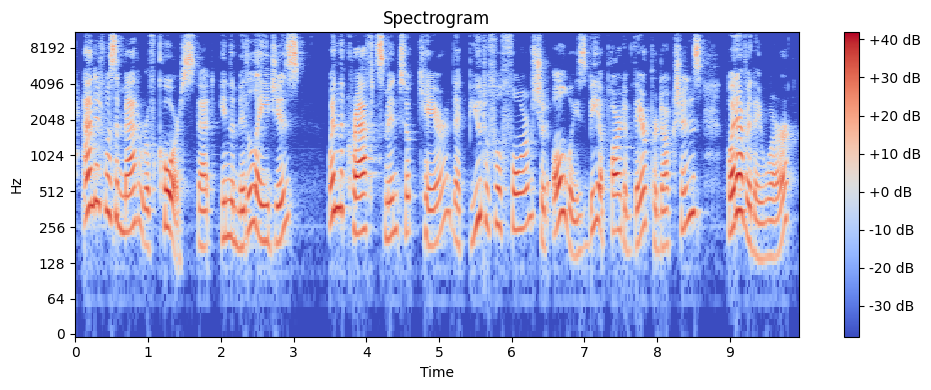

In [8]:
import librosa
import librosa.display
import matplotlib.pyplot as plt


# 1. Compute the STFT
stft_result = librosa.stft(waveform)

# 2. Convert amplitude spectrum to dB
spectrogram_db = librosa.amplitude_to_db(abs(stft_result))

# 3. Plot the spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(spectrogram_db, sr=sample_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.tight_layout()
plt.show()


### Experiment 2

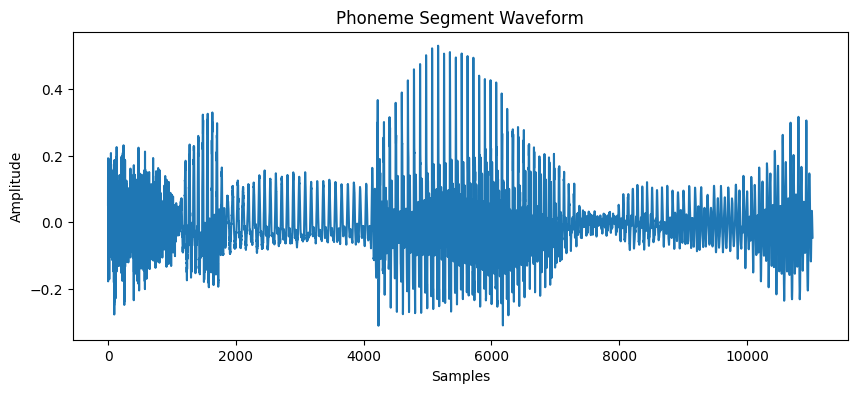

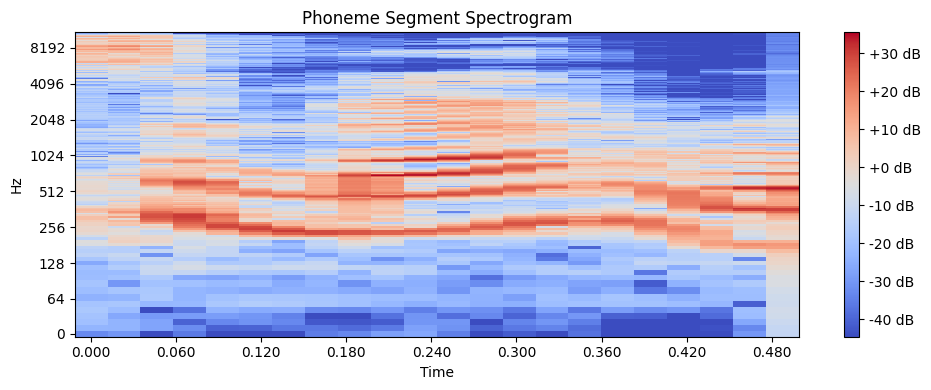

In [9]:

# phoneme segment extraction
start_sample = int(0.5 * sample_rate)  # start at 0.5 seconds
end_sample = int(1.0 * sample_rate)    # end at 1.0 seconds
phoneme_segment = waveform[start_sample:end_sample]


# Waveform visualization
plt.figure(figsize=(10, 4))
plt.plot(phoneme_segment)
plt.title("Phoneme Segment Waveform")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.show()


# Spectrogram visualization
# 1. Compute the STFT of the phoneme segment
stft_result = librosa.stft(phoneme_segment)

# 2. Convert amplitude spectrum to dB
spectrogram_db = librosa.amplitude_to_db(abs(stft_result))

# 3. Plot the spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(spectrogram_db, sr=sample_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Phoneme Segment Spectrogram')
plt.tight_layout()
plt.show()
